In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User_ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,User_ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.sample()

,User_ID,Gender,Age,EstimatedSalary,Purchased
71,15726358,Female,24,27000,0


In [ ]:
df.loc[4]

User_ID            15804002
Gender                 Male
Age                      19
EstimatedSalary       76000
Purchased                 0
Name: 4, dtype: object

In [ ]:
df.describe() #statistical computations

,User_ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.Gender.value_counts() #Total number of males and females

Female    204
Male      196
Name: Gender, dtype: int64

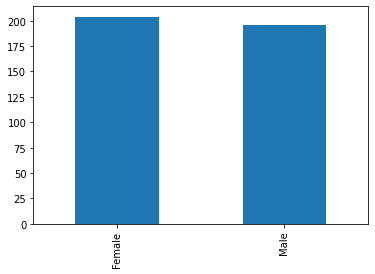

In [ ]:
df.Gender.value_counts().plot(kind="bar");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


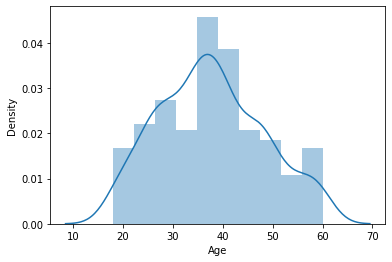

In [ ]:
sns.distplot(df.Age)

In [ ]:
df.isnull().sum() #To check if there are any missing values

User_ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.duplicated().sum() #To check are there any duplicated values in the dataset

0

In [ ]:
df.groupby(['Gender','Purchased'])['Purchased'].count().unstack() #Total number of males and females purchased

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [ ]:
pd.crosstab(index=df['EstimatedSalary'],columns='count').sort_values(['count'],ascending=False)  #Maximum number of users belong to which salary range

col_0,count
EstimatedSalary,
72000,12
80000,11
79000,10
75000,9
71000,9
...,...
120000,1
97000,1
123000,1


In [ ]:
df.sort_values(by=['Age'],ascending = True) #sorting based on age

,User_ID,Gender,Age,EstimatedSalary,Purchased
76,15746737,Male,18,52000,0
165,15578738,Female,18,86000,0
51,15764195,Female,18,44000,0
14,15628972,Male,18,82000,0
141,15666141,Female,18,68000,0
...,...,...,...,...,...
393,15635893,Male,60,42000,1
370,15611430,Female,60,46000,1
223,15593715,Male,60,102000,1
355,15606472,Male,60,34000,1


In [ ]:
df.groupby('Purchased')['Age','EstimatedSalary'].mean()

<ipython-input-19-eb57e5aafc04>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Purchased')['Age','EstimatedSalary'].mean()


,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


**DATA VISUALISATION**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
c=df.loc[df['Gender']=='Male']
d=c['Gender'][c['Purchased']==0].count()

f=c['Gender'][c['Purchased']==1].count()
h=df.loc[df['Gender']=='Female']
i=c['Gender'][c['Purchased']==0].count()

j=c['Gender'][c['Purchased']==1].count()

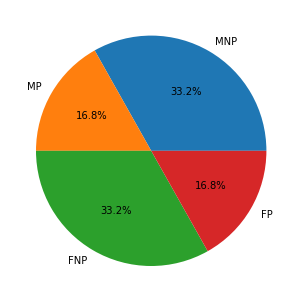

In [ ]:
fig1 = plt.figure()
ax = fig1.add_axes([0,0,1,1])
languages = ['MNP','MP','FNP','FP']
people = [d,f,i,j]
ax.pie(people, labels=languages, autopct='%1.1f%%')
plt.show()

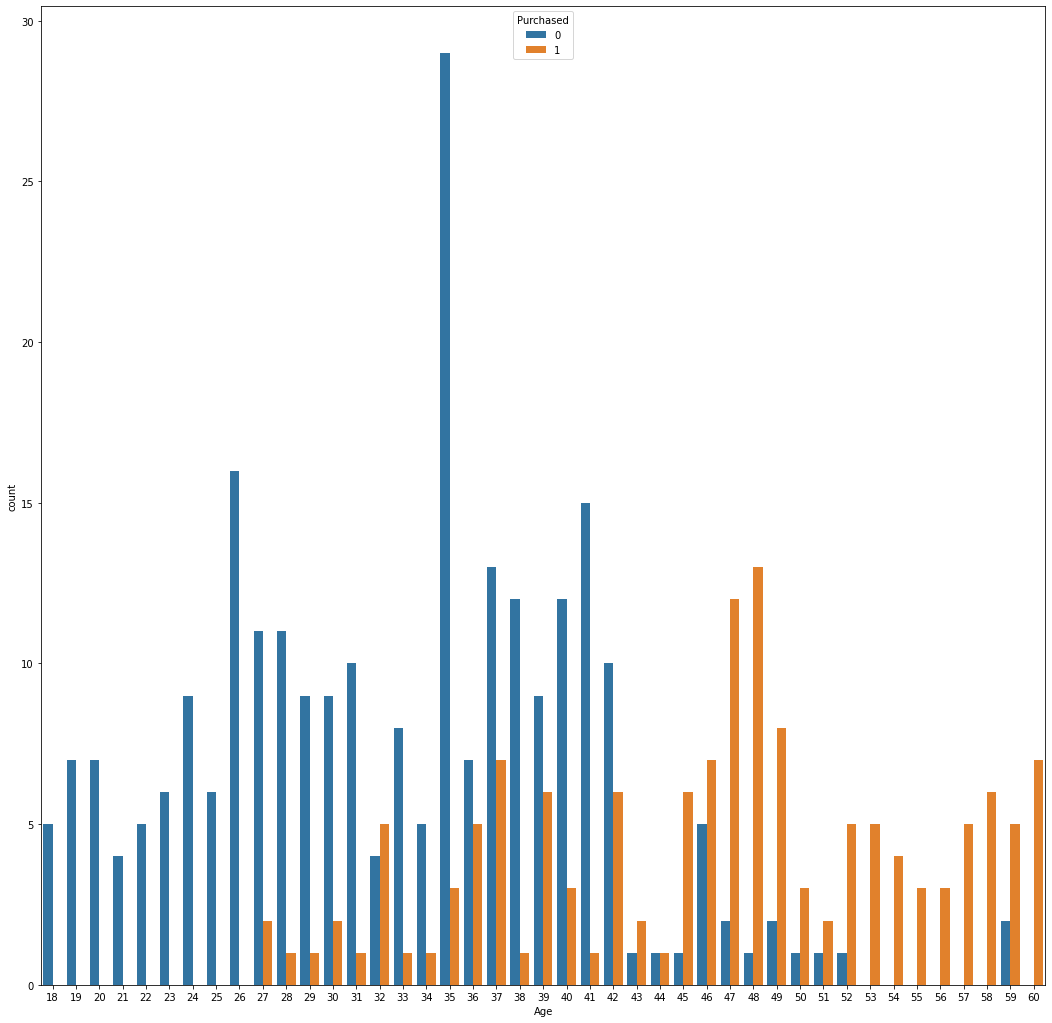

In [ ]:
plt.figure(figsize = (18,18))
sns.countplot(x ='Age', hue = "Purchased", data = df)

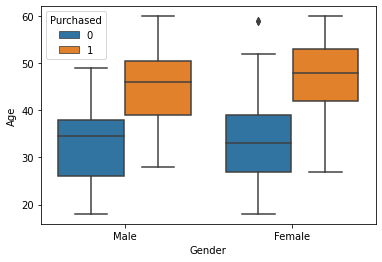

In [ ]:
sns.boxplot(y='Age', x='Gender',data=df,hue='Purchased')

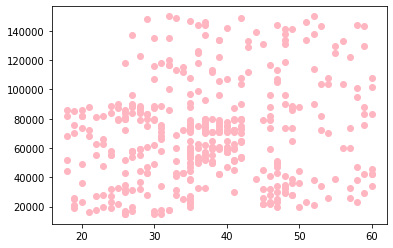

In [ ]:
plt.scatter(df.Age,df.EstimatedSalary,color = 'lightpink')

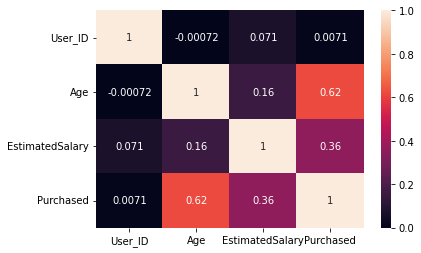

In [ ]:
sns.heatmap(df.corr(),annot = True)

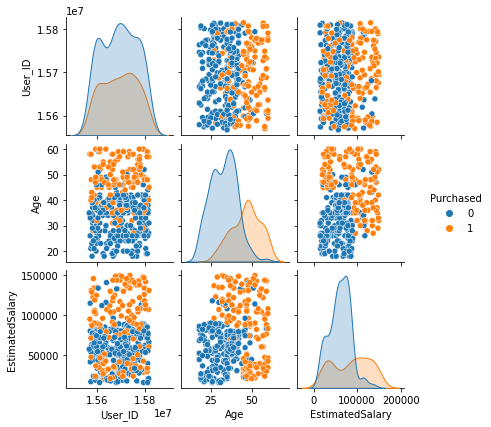

In [ ]:
sns.pairplot(df, hue='Purchased', height=2)

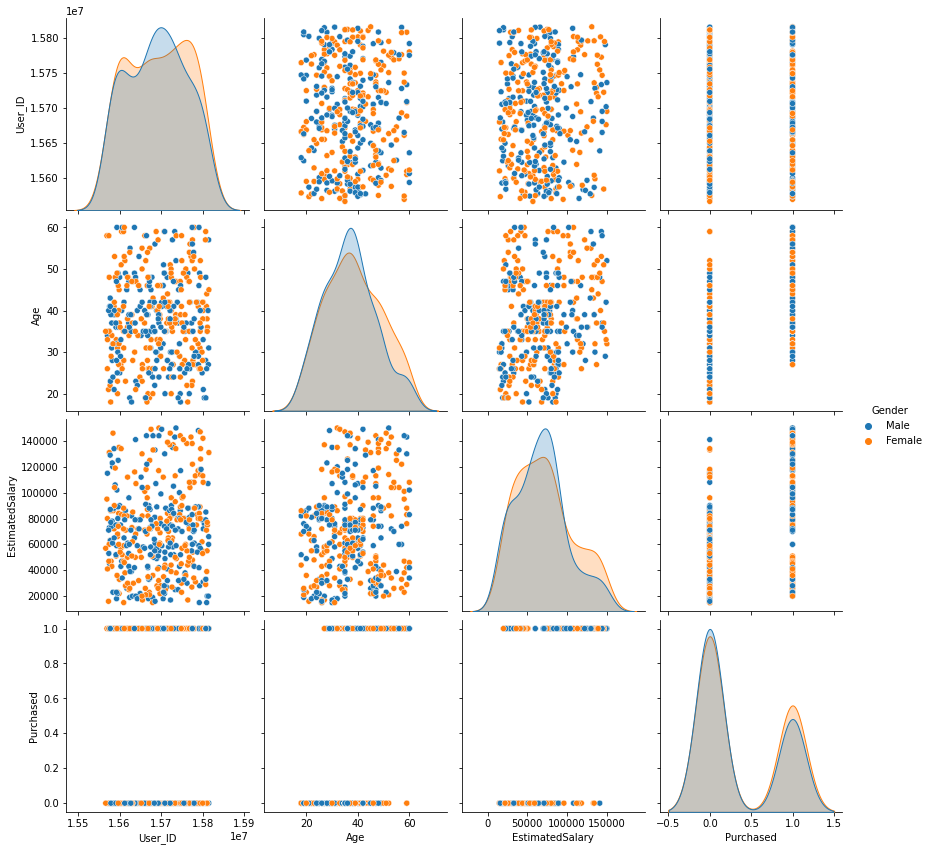

In [ ]:
sns.pairplot(df, hue='Gender', height=3)

In [ ]:
d1=df['Age'][df['Age']<25].count()
a=df.loc[df['Age']>=25]
b=df.loc[df['Age']<40]
c=b.merge(a)
c=c['Age'].count()
e=df.loc[df['Age']>=40].count()
e=df['Age'][df['Age']>=40].count()



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


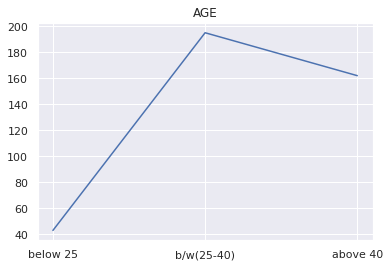

In [ ]:
sns.set_theme(style="darkgrid")

x = ['below 25', 'b/w(25-40)', 'above 40',]
y = [d1,c,e]
plt.title("AGE")
sns.lineplot(x, y)
plt.show()

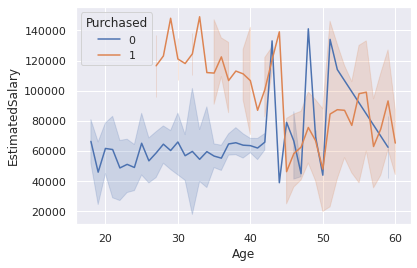

In [ ]:
sns.lineplot(x="Age", y="EstimatedSalary", data=df, hue="Purchased")

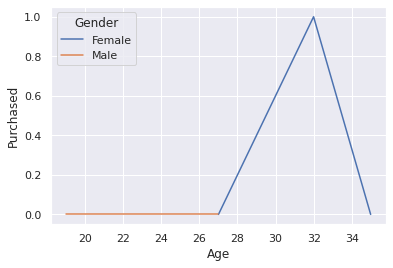

In [ ]:
data = df.iloc[3:10, :] #selecting required rows and columns
sns.lineplot(x='Age',y='Purchased',data = data,hue='Gender')

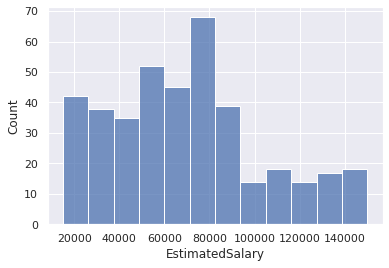

In [ ]:
sns.histplot(x='EstimatedSalary', bins=12,data=df )
plt.show()

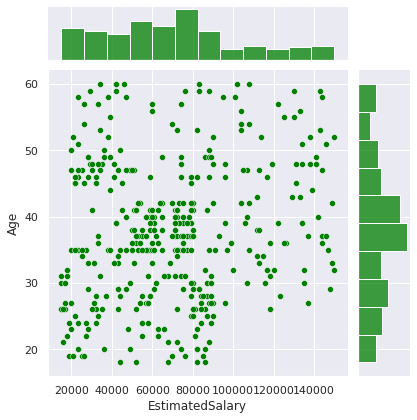

In [ ]:
sns.jointplot(x='EstimatedSalary',y='Age',data = df,color='green')

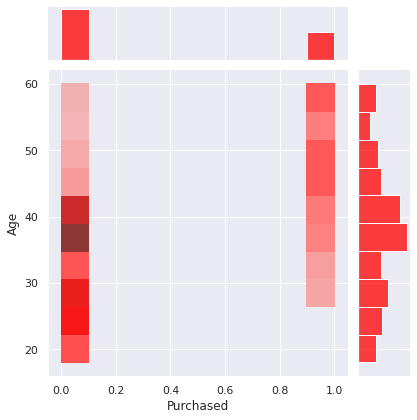

In [ ]:
sns.jointplot(x='Purchased',y='Age',kind='hist',data = df,color='red')

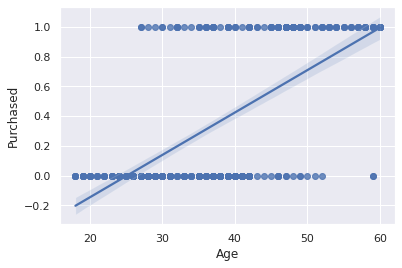

In [ ]:
sns.regplot(x ='Age', y ='Purchased', data = df)

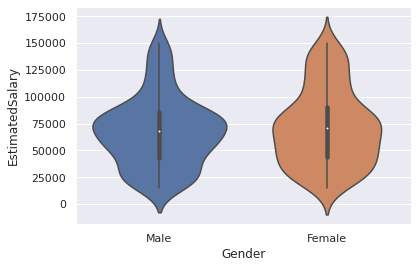

In [ ]:
sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.show()

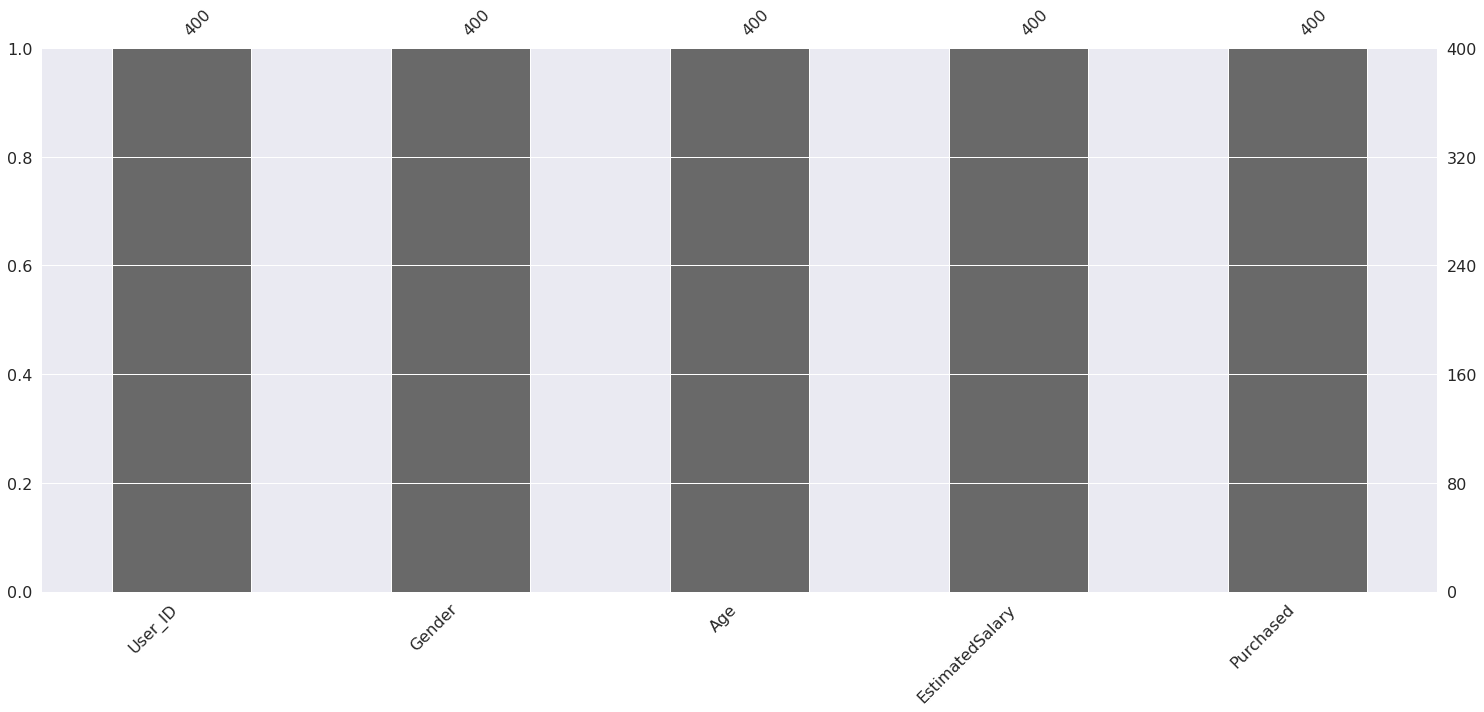

In [ ]:
msno.bar(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PURCHASED')

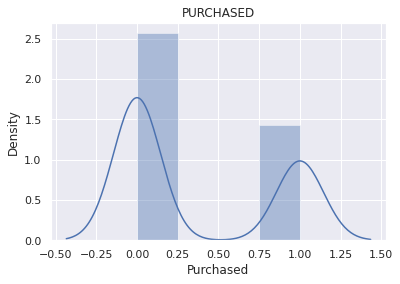

In [ ]:
sns.distplot(df['Purchased'])
plt.title("PURCHASED")


In [ ]:
df['Gender'][df['Purchased']==0].count()

257

In [ ]:
df['Gender'][df['Purchased']==1].count()

143

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


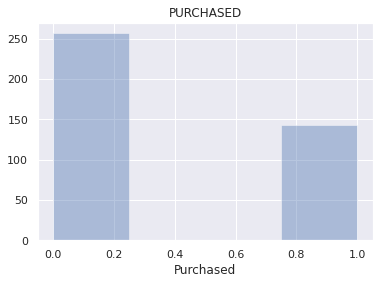

In [ ]:
sns.distplot(df['Purchased'],kde=False)
plt.title("PURCHASED")
plt.show()

**FEATURE ENGINEERING**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


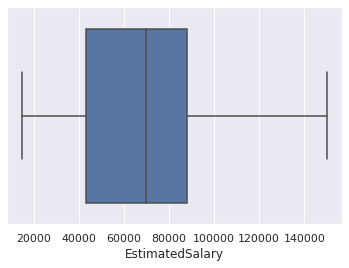

In [ ]:
sns.boxplot(df['EstimatedSalary'])

In [ ]:
Q1 = np.percentile(df['EstimatedSalary'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['EstimatedSalary'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
upper = np.where(df['EstimatedSalary'] >= (Q3+1.5*IQR))
lower = np.where(df['EstimatedSalary'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (400, 5)
New Shape:  (400, 5)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


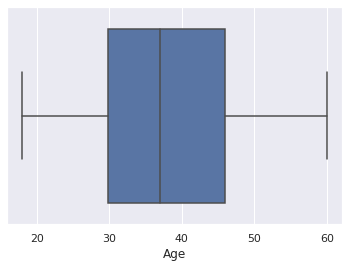

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
Q1 = np.percentile(df['Age'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)
upper = np.where(df['Age'] >= (Q3+1.5*IQR))
lower = np.where(df['Age'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Shape: ", df.shape)

Old Shape:  (400, 5)
New Shape:  (400, 5)


In [ ]:
k=df.isnull().sum()
k

User_ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

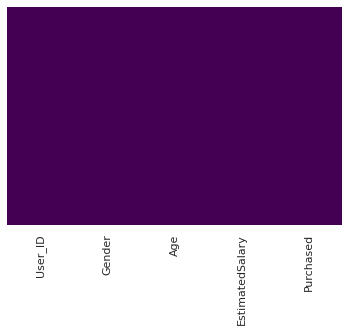

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Filling Empty values by Mean or Median or Mode**

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

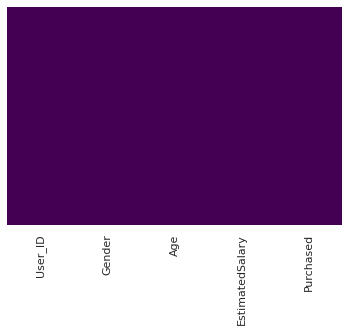

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**The empty values are replaced by mean.**

**ENCODING**

In [ ]:

Edf = pd.get_dummies(df, columns = ['Gender'])
Edf

,User_ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [ ]:
a = len(Edf[Edf['Gender_Female'] == 1])
print("Number of Female users:",a)

Number of Female users: 204


In [ ]:
b = len(Edf[Edf['Gender_Male'] == 1])
print("Number of Male users:",b)

Number of Male users: 196


**SPLIT OF DATA**

In [ ]:
X=Edf[['Age','EstimatedSalary','Gender_Male']]
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

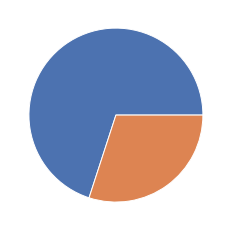

In [ ]:
Split=np.array([70,30])
plt.pie(Split)
plt.show()

**1. LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train.values,y_train)

LogisticRegression(random_state=0)

Predicted Values

In [ ]:
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,0
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[80  0]
 [40  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


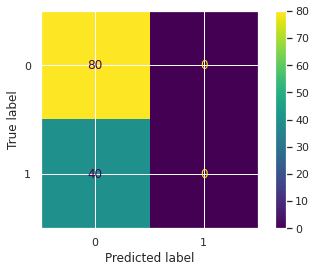

In [ ]:
plot_confusion_matrix(lr, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.0
Sensitivity :  0.0
Specificity :  1.0
F1 score :  0.0
Accuracy :  0.6666666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
LR = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**2. DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train.values,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predicted Values**

In [ ]:
y_pred = dtree.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[70 10]
 [ 6 34]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


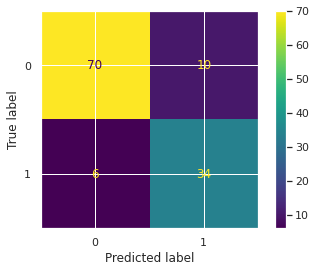

In [ ]:
plot_confusion_matrix(dtree, X_test, y_test)

**Decision Tree **

[Text(0.5411184210526315, 0.9583333333333334, 'Age <= 42.5\nentropy = 0.949\nsamples = 280\nvalue = [177, 103]\nclass = 0'),
 Text(0.28289473684210525, 0.875, 'EstimatedSalary <= 89500.0\nentropy = 0.671\nsamples = 199\nvalue = [164, 35]\nclass = 0'),
 Text(0.14473684210526316, 0.7916666666666666, 'Age <= 36.5\nentropy = 0.252\nsamples = 166\nvalue = [159, 7]\nclass = 0'),
 Text(0.11842105263157894, 0.7083333333333334, 'entropy = 0.0\nsamples = 110\nvalue = [110, 0]\nclass = 0'),
 Text(0.17105263157894737, 0.7083333333333334, 'EstimatedSalary <= 72500.0\nentropy = 0.544\nsamples = 56\nvalue = [49, 7]\nclass = 0'),
 Text(0.07894736842105263, 0.625, 'Age <= 37.5\nentropy = 0.165\nsamples = 41\nvalue = [40, 1]\nclass = 0'),
 Text(0.05263157894736842, 0.5416666666666666, 'EstimatedSalary <= 66000.0\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]\nclass = 0'),
 Text(0.02631578947368421, 0.4583333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 0'),
 Text(0.07894736842105263, 0.

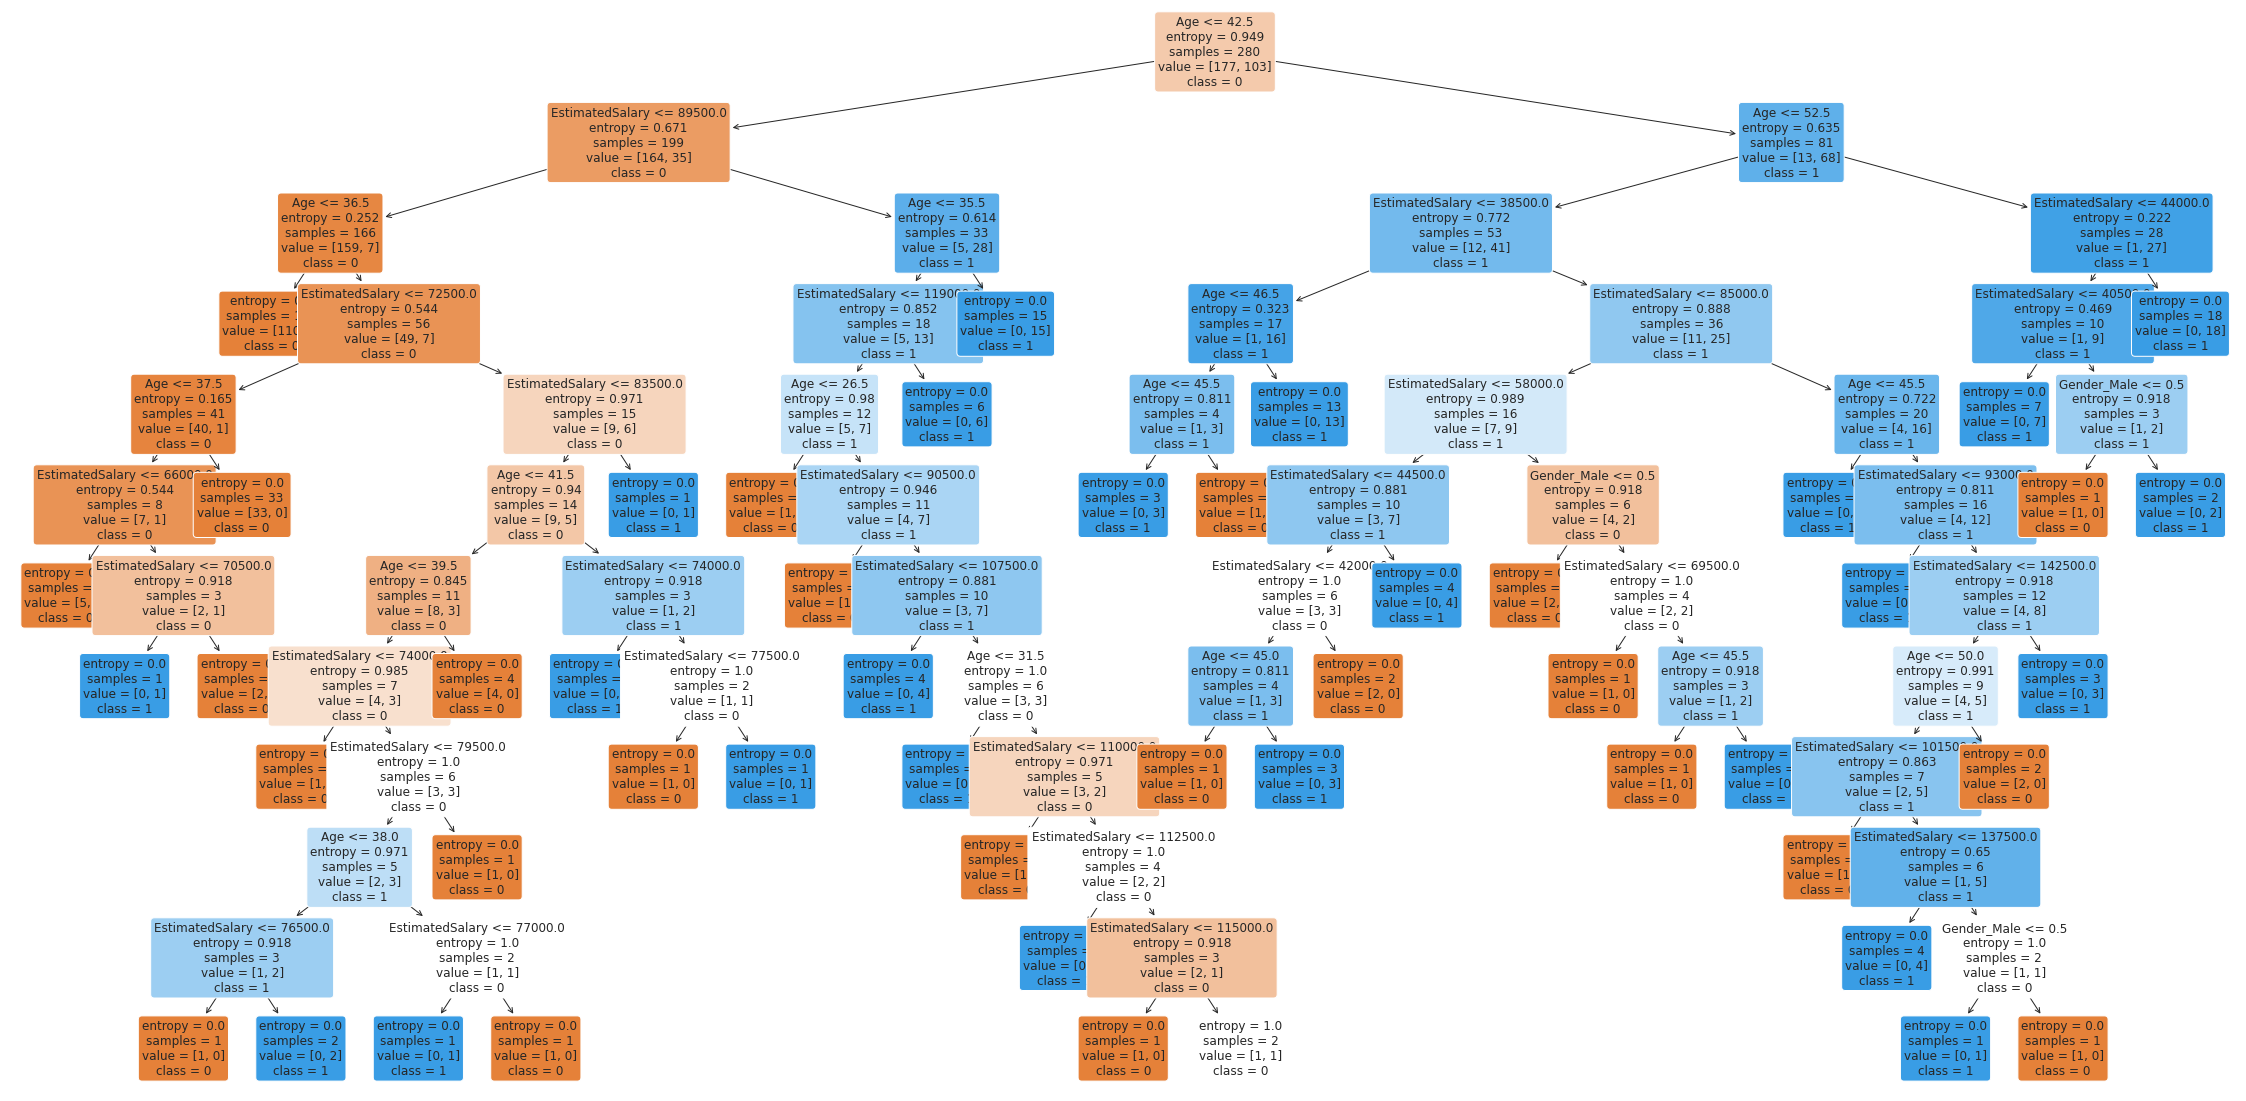

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))
tree.plot_tree(dtree,class_names=['0','1'],feature_names=X.columns, filled=True,rounded=True,fontsize=12)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.7727272727272727
Sensitivity :  0.85
Specificity :  0.875
F1 score :  0.8095238095238095
Accuracy :  0.8666666666666667


In [ ]:
DTREE = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**3. RANDOM FOREST (No of Trees in the Forest = 2)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators=2)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

**Predicted Values**

In [ ]:
y_pred = rf1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix)

Confusion Matrix: 
 [[74  6]
 [ 7 33]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


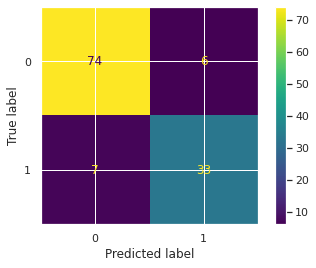

In [ ]:
plot_confusion_matrix(rf1, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8461538461538461
Sensitivity :  0.825
Specificity :  0.925
F1 score :  0.8354430379746836
Accuracy :  0.8916666666666667


In [ ]:
RF1 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**4. RANDOM FOREST (No of Trees in the Forest = 5)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators=5)
rf2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

**Predicted Values**

In [ ]:
y_pred = rf2.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[71  9]
 [ 3 37]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


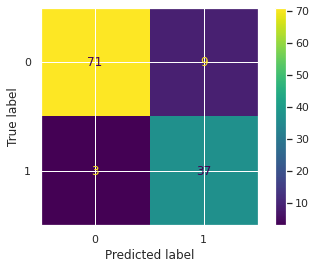

In [ ]:
plot_confusion_matrix(rf2, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8043478260869565
Sensitivity :  0.925
Specificity :  0.8875
F1 score :  0.8604651162790697
Accuracy :  0.9


In [ ]:
RF2 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**5. RANDOM FOREST (No of Trees in the Forest = 10)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf3 = RandomForestClassifier(n_estimators=10)
rf3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

**Predicted Values**

In [ ]:
y_pred = rf3.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[74  6]
 [ 1 39]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


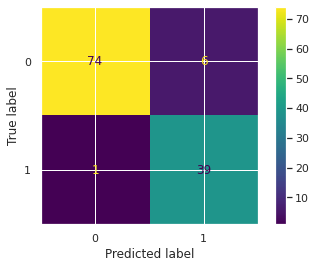

In [ ]:
plot_confusion_matrix(rf3, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8666666666666667
Sensitivity :  0.975
Specificity :  0.925
F1 score :  0.9176470588235294
Accuracy :  0.9416666666666667


In [ ]:
RF3 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**6. RANDOM FOREST (No of Trees in the Forest = 20)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf4 = RandomForestClassifier(n_estimators=20)
rf4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

**Predicted Values**

In [ ]:
y_pred = rf4.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[73  7]
 [ 2 38]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


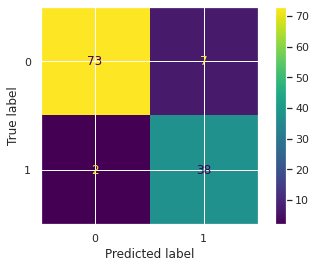

In [ ]:
plot_confusion_matrix(rf4, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8444444444444444
Sensitivity :  0.95
Specificity :  0.9125
F1 score :  0.8941176470588236
Accuracy :  0.925


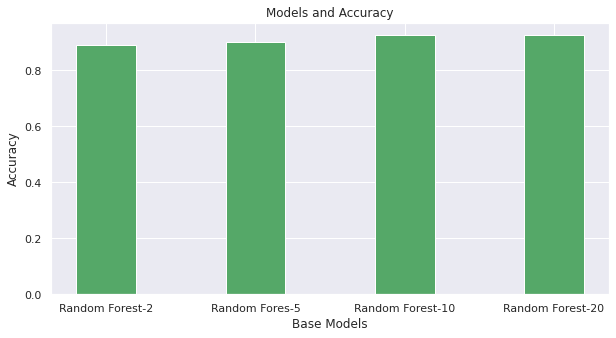

In [ ]:
mod=['Random Forest-2','Random Fores-5','Random Forest-10','Random Forest-20']
val=[0.8916666666666667, 0.9,0.925,0.925]
fig = plt.figure(figsize = (10, 5))
plt.bar(mod, val, color ='g',width = 0.4)
plt.xlabel("Base Models")
plt.ylabel("Accuracy")
plt.title("Models and Accuracy")
plt.show()

In [ ]:
RF4 = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**7. Suport Vector Machines**

In [ ]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train,y_train)

SVC()

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[73  7]
 [ 2 38]]


In [ ]:
## 1. Regularization (C)

from sklearn.svm import SVC

model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)
model_C = SVC(C=10)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)


0.8

In [ ]:
## 2. Gamma

model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.6666666666666666

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':(1, 10, 100, 1000), 'gamma':(0.1, 0.01, 0.001, 0.0001)}

grid_search = GridSearchCV(svc, param_grid, cv=10, verbose=10)

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START C=1, gamma=0.1............................................
[CV 1/10; 1/16] END .............C=1, gamma=0.1;, score=0.607 total time=   0.0s
[CV 2/10; 1/16] START C=1, gamma=0.1............................................
[CV 2/10; 1/16] END .............C=1, gamma=0.1;, score=0.643 total time=   0.0s
[CV 3/10; 1/16] START C=1, gamma=0.1............................................
[CV 3/10; 1/16] END .............C=1, gamma=0.1;, score=0.679 total time=   0.0s
[CV 4/10; 1/16] START C=1, gamma=0.1............................................
[CV 4/10; 1/16] END .............C=1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 5/10; 1/16] START C=1, gamma=0.1............................................
[CV 5/10; 1/16] END .............C=1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 6/10; 1/16] START C=1, gamma=0.1............................................
[CV 6/10; 1/16] END .............C=1, gamma=0.

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (1, 10, 100, 1000),
                         'gamma': (0.1, 0.01, 0.001, 0.0001)},
             verbose=10)

In [ ]:
grid_search.best_params_

{'C': 1, 'gamma': 0.01}

In [ ]:
from sklearn import svm

Tuned_Model= svm.SVC()
Tuned_Model.fit(X_train,y_train)
Tuned_Model.score(X_test, y_test)

0.7833333333333333

**Predicted Values**

In [ ]:
y_pred = Tuned_Model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


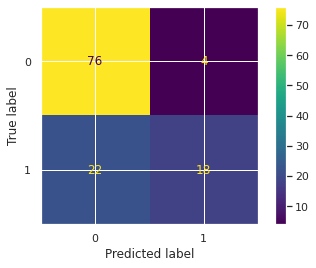

In [ ]:
plot_confusion_matrix(svc, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8181818181818182
Sensitivity :  0.45
Specificity :  0.95
F1 score :  0.5806451612903226
Accuracy :  0.7833333333333333


In [ ]:
SVC = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**8. Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

**Predicted Values**

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[74  6]
 [ 4 36]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


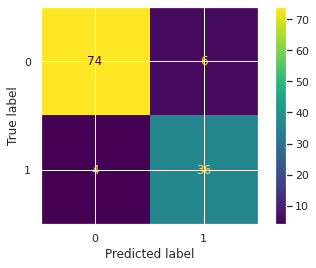

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8571428571428571
Sensitivity :  0.9
Specificity :  0.925
F1 score :  0.8780487804878048
Accuracy :  0.9166666666666666


In [ ]:
GNB = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[74  6]
 [ 4 36]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


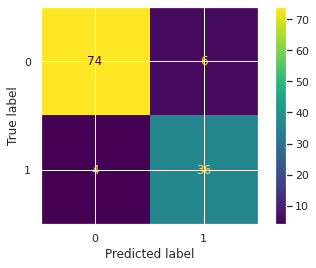

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test)

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.8571428571428571
Sensitivity :  0.9
Specificity :  0.925
F1 score :  0.8780487804878048
Accuracy :  0.9166666666666666


**9. K- Nearest Neighbours**

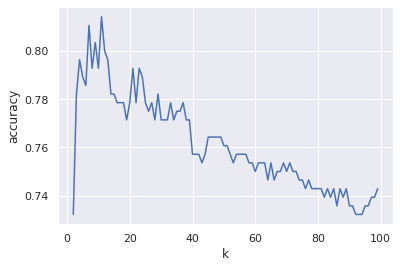

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
ks = np.arange(2, 100)
scores = []
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train, cv=5)
    score.mean()
    scores.append(score.mean())

plt.plot(ks,scores)
plt.ylabel('accuracy')
plt.xlabel('k')
plt.show()


### We have maximum accuracy score if value of k is 11.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

**Predicted Values**

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,1


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[71  9]
 [12 28]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


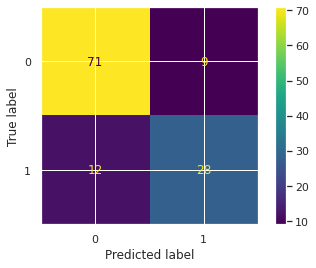

In [ ]:
plot_confusion_matrix(knn, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.7567567567567568
Sensitivity :  0.7
Specificity :  0.8875
F1 score :  0.7272727272727273
Accuracy :  0.825


In [ ]:
KNN = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**10. Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
pct = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

**Predicted Values**

In [ ]:
y_pred = pct.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,0
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[80  0]
 [40  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


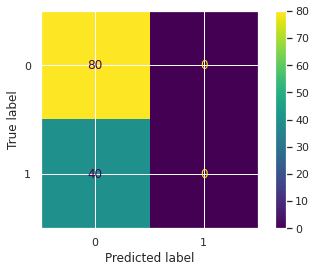

In [ ]:
plot_confusion_matrix(pct, X_test, y_test)

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.0
Sensitivity :  0.0
Specificity :  1.0
F1 score :  0.0
Accuracy :  0.6666666666666666


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
PCT = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**11. K- Means Clustering**

In [ ]:
x1 = df['Age']
y1 = df['EstimatedSalary']
y2=df['Purchased']

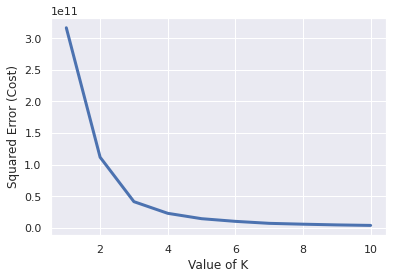

In [ ]:
from sklearn.cluster import KMeans
cost =[]
data1 = list(zip(x1, y1))
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(X_train)
    cost.append(KM.inertia_)
plt.plot(range(1, 11), cost, linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

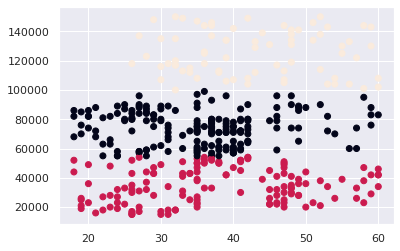

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data1)

plt.scatter(x1, y1,c=kmeans.labels_)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=None)
kmeans.fit(X_train)

KMeans(n_clusters=3)

### The point at which distortion declines the most is at k = 2.

In [ ]:
km = KMeans(n_clusters=2,init="random",random_state=42)
km.fit(X_train)

KMeans(init='random', n_clusters=2, random_state=42)

**Predicted Values**

In [ ]:
y_pred = km.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int32)

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,1
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[55 25]
 [14 26]]


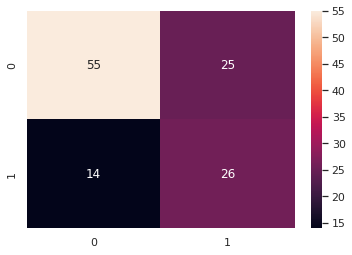

In [ ]:
sns.heatmap(confusionmatrix, annot=True, fmt='g')

**Metrics**

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.5098039215686274
Sensitivity :  0.65
Specificity :  0.6875
F1 score :  0.5714285714285715
Accuracy :  0.675


In [ ]:
KM = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

**12. Agglomerative Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
ac.fit(X_train)

AgglomerativeClustering()

**Predicted Values**

In [ ]:
y_pred = ac.fit_predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
38,0,0
387,0,0
270,0,1
181,0,0
195,0,0
...,...,...
228,0,0
178,0,0
267,0,0
147,0,0


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',confusionmatrix )

Confusion Matrix: 
 [[76  4]
 [19 21]]


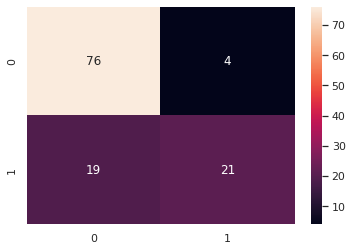

In [ ]:
sns.heatmap(confusionmatrix, annot=True, fmt='g')

## Dendogram

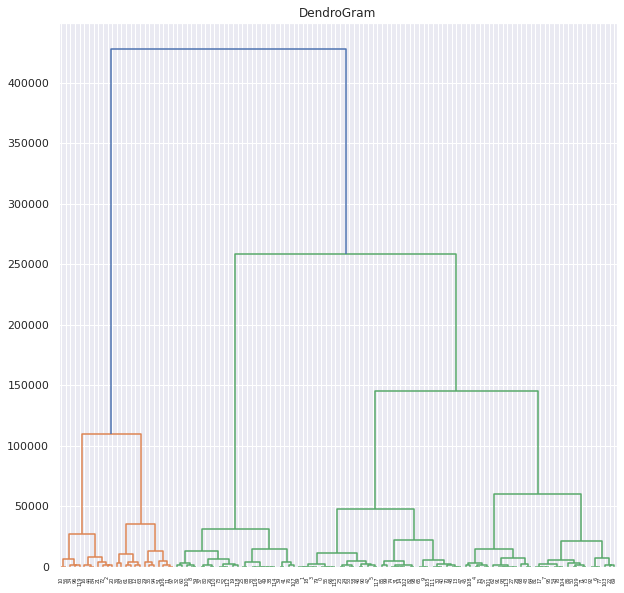

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,10))
plt.title("DendroGram")
dendo = shc.dendrogram(shc.linkage(X_test,method="ward"))

## Metrics

In [ ]:
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)

print("Precision : ", Precision)
print("Sensitivity : ", Sensitivity_recall)
print("Specificity : ", Specificity)
print("F1 score : ",F1_score)
print("Accuracy : ", Accuracy)

Precision :  0.84
Sensitivity :  0.525
Specificity :  0.95
F1 score :  0.6461538461538462
Accuracy :  0.8083333333333333


In [ ]:
AC = [Accuracy,Precision,Sensitivity_recall,Specificity,F1_score]

# **GUI**

In [ ]:
pip install gradio

In [ ]:
X_train

,Age,EstimatedSalary,Gender_Male
237,37,80000,0
268,47,144000,0
186,20,82000,0
106,26,35000,0
41,33,51000,0
...,...,...,...
63,32,120000,1
326,41,72000,1
337,35,79000,1
11,26,52000,0


In [ ]:
y_train

237    0
268    1
186    0
106    0
41     0
      ..
63     1
326    0
337    0
11     0
351    0
Name: Purchased, Length: 280, dtype: int64

In [ ]:
import gradio as gr

In [ ]:
def Purchased(Age, EstimatedSalary,Gender_Male):
#turning the arguments into a numpy array
  x = np.array([Age,EstimatedSalary,Gender_Male])
  prediction = rf3.predict(x.reshape(1, -1))
  return prediction

In [ ]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=Purchased, inputs=[gr.inputs.Slider(1,200,label="Age"),'number','number'], outputs=outputs,description="This is a Purchasing model")
app.launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://39c520bb-f135-4351.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [ ]:
def Purchased(Age, EstimatedSalary,Gender_Male):
#turning the arguments into a numpy array
  x = np.array([Age,EstimatedSalary,Gender_Male])
  prediction = gnb.predict(x.reshape(1, -1))
  return prediction

In [ ]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=Purchased, inputs=['number','number','number'], outputs=outputs,description="This is a Purchasing model")
app.launch(share=True)

/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6533fc1f-a10f-4dbe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# **ANALYSIS**

In [ ]:
LR.insert(0,"LR")
DTREE.insert(0,"DT")
RF1.insert(0,"RF2")
RF2.insert(0,"RF5")
RF3.insert(0,"RF10")
RF4.insert(0,"RF20")
SVC.insert(0,"SVM")
GNB.insert(0,"GNB")
KNN.insert(0,"KNN")
KM.insert(0,"KMC")
AC.insert(0,"AC")
PCT.insert(0,"PCT")
final = np.array([LR,DTREE,RF1,RF2,RF3,RF4,SVC,GNB,KNN,KM,AC,PCT])

In [ ]:
analysis = pd.DataFrame(final, columns = ["Model", "Accuracy", "Precision", "Sensitivity_recall", "Specificity", "F1_score"])
analysis.sort_values(by=["Accuracy","F1_score"],ascending=False)

,Model,Accuracy,Precision,Sensitivity_recall,Specificity,F1_score
4,RF10,0.9416666666666667,0.8666666666666667,0.975,0.925,0.9176470588235294
5,RF20,0.925,0.8444444444444444,0.95,0.9125,0.8941176470588236
7,GNB,0.9166666666666666,0.8571428571428571,0.9,0.925,0.8780487804878048
3,RF5,0.9,0.8043478260869565,0.925,0.8875,0.8604651162790697
2,RF2,0.8916666666666667,0.8461538461538461,0.825,0.925,0.8354430379746836
1,DT,0.8666666666666667,0.7727272727272727,0.85,0.875,0.8095238095238095
8,KNN,0.825,0.7567567567567568,0.7,0.8875,0.7272727272727273
10,AC,0.8083333333333333,0.84,0.525,0.95,0.6461538461538462
6,SVM,0.7833333333333333,0.8181818181818182,0.45,0.95,0.5806451612903226
9,KMC,0.675,0.5098039215686274,0.65,0.6875,0.5714285714285715


<BarContainer object of 12 artists>

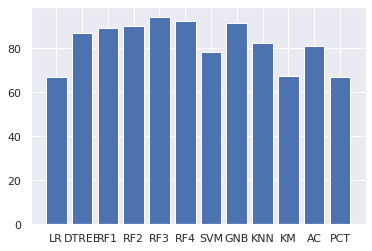

In [ ]:
md=['LR','DTREE','RF1','RF2','RF3','RF4','SVM','GNB','KNN','KM','AC','PCT']
acc=[67,87,89.16,90,94.1,92.5,78.33,91.6,82.5,67.5,80.83,67]
plt.bar(md,acc)